In [10]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.w_ = 0.0
        self.b_= 0.0
        self.errors_ = []

    def fit(self, X, y):
        random_num = np.random.default_rng(self.random_state)
        self.w_ = random_num.normal(loc = 0.0, scale=0.01, size = X.shape[1])
        # self.w_ = np.zeros(shape= X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
             
    def predict(self, X):
        return np.where(self.net_input(X)> 0.0, 1, 0)

/tmp/ipykernel_53808/1673657165.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


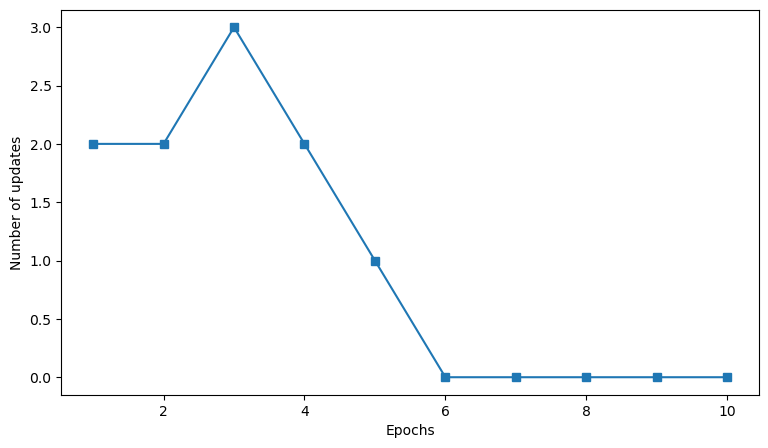

In [49]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(dataset_url, header=None, names=['s_len','s_width','p_len','p_width','plant'], encoding='utf-8')

y = df.iloc[0:100, 4].to_numpy()

y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0,2]].to_numpy()

# fig,ax = plt.subplots(figsize=(9,5))
# ax.scatter(X[:50,0], X[:50,1],color="green",marker='o',label='Setosa')
# ax.set_xlabel('Sepal Length[cm]')
# ax.set_ylabel('Petal Length[cm]')

# ax.scatter(X[50:100, 0], X[50:100,1],color='blue', marker='x', label='Versicolor')
# fig.legend()

iris_model = Perceptron(n_iter=10, eta = 0.1)
iris_model.fit(X,y)

# Plot the errors
fig, ax = plt.subplots(figsize = (9, 5))
ax.plot(range(1, len(iris_model.errors_)+1), iris_model.errors_, marker = 's')
ax.set_xlabel("Epochs")
ax.set_ylabel("Number of updates")

fig.show()